In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#Load dataset
data = pd.read_csv('insurance_data.csv')

In [ ]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
data.shape

(27, 2)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27.0,39.666667,15.745573,18.0,25.0,45.0,54.5,62.0
bought_insurance,27.0,0.518519,0.509175,0.0,0.0,1.0,1.0,1.0


In [ ]:
x = data[['age']]
y = data['bought_insurance']
#Training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
#Scalingfor SVM and Neural networks
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#Initialize model
models = {
    'Logistic Regression' : LogisticRegression(),
    'SVM' : SVC(probability = True),
    'Random Forest Classifier' : RandomForestClassifier(n_estimators = 100, random_state = 42),
    'Neural network' : MLPClassifier(hidden_layer_sizes = (10,10), random_state = 42, max_iter = 1000)
    }

result = {}
#Train and evaluate
for name, model in models.items():
  if name in ['SVM', 'Neural network']:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
  else:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  cr = classification_report(y_test, y_pred, output_dict = True)
  result[name] = {'Accuracy' : acc, "Confusion matrix" : cm, 'Classification report' : cr}
  print(f"\n{name} results:")
  print("Accuracy = ", acc)
  print("Confusion matrix", cm)
  print("Classification report: \n", classification_report(y_test, y_pred))


Logistic Regression results:
Accuracy =  0.8888888888888888
Confusion matrix [[5 0]
 [1 3]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9


SVM results:
Accuracy =  0.8888888888888888
Confusion matrix [[5 0]
 [1 3]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9


Random Forest Classifier results:
Accuracy =  0.8888888888888888
Confusion matrix [[5 0]
 [1 3]]
Classification report: 
    

/tmp/ipython-input-2087758722.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


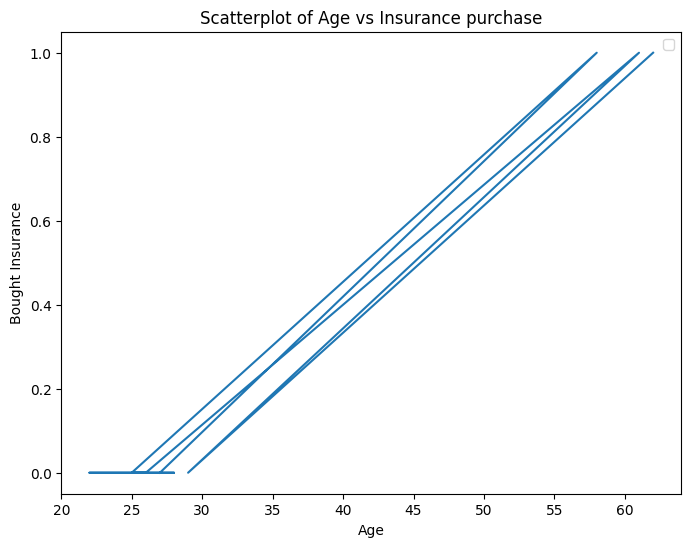

In [37]:
plt.figure(figsize = (8,6))
plt.plot(x_test, y_pred)
plt.title("Scatterplot of Age vs Insurance purchase")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("categorical_features.csv")
df.head(10)

,column
0,name_contract_type
1,code_gender
2,name_type_suite
3,name_income_type
4,name_education_type
5,name_family_status
6,name_housing_type
7,occupation_type
8,weekday_appr_process_start
9,organization_type
